# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import datetime
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
from scipy import stats
sns.set(style = "white",color_codes = True)

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_transactions = pd.read_csv('../input/final-project-ds/transactions.csv')
df_customer = pd.read_csv('../input/final-project-ds/customer.csv')

In [4]:
df_transaction = pd.read_csv('../input/final-project-ds/transactions.csv')

In [5]:
df_transactions['created_at'] = pd.to_datetime(df_transactions['created_at'], infer_datetime_format=True, utc = True)
df_transaction['created_at'] = pd.to_datetime(df_transaction['created_at'], infer_datetime_format=True, utc = True)
df_transactions = df_transactions.loc[(df_transactions["created_at"] >= "2021-05-01") & (df_transactions["created_at"] < "2021-10-31")].copy()
df_transaction = df_transaction.loc[(df_transaction["created_at"] >= "2021-05-01") & (df_transaction["created_at"] < "2021-10-31")].copy()

# Feature Engineering

In [6]:
df_transactions

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
23,2021-05-29 10:59:02.365620+00:00,4774,e4a15e0c-8848-49c4-8648-8e5e7bf8e9a0,a4ad7fb7-6a09-450b-aa8d-97e28c0cda20,"[{'product_id': 6572, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,10000,2021-06-03T18:15:49.265999Z,-7.154563,110.855725,164335
24,2021-07-15 11:06:17.365620+00:00,4774,57b61173-4837-449a-a5fb-22b0cd07d56d,b0ab036c-5c29-417b-9c2e-1a41d872028a,"[{'product_id': 18001, 'quantity': 1, 'item_pr...",LinkAja,Success,6325,AZ2022,10000,2021-07-17T19:21:39.314719Z,-3.122690,126.418906,75865
25,2021-08-31 11:05:02.365620+00:00,4774,91d7b8a0-f3f5-4a0c-843a-f83a75b415e2,b2fb0889-6e08-4bc5-b6ba-2ac71d1b3145,"[{'product_id': 10460, 'quantity': 4, 'item_pr...",Credit Card,Success,0,NaN,10000,2021-09-05T15:37:35.476812Z,-1.300594,111.913009,2091956
26,2021-10-17 11:45:13.365620+00:00,4774,6a32b1ef-142a-41f8-8046-f9b74676233d,ced773bd-a755-4e23-a1ab-4a96ef9c75e1,"[{'product_id': 2334, 'quantity': 1, 'item_pri...",Credit Card,Success,2752,WEEKENDSERU,10000,2021-10-22T05:58:33.933514Z,-7.502613,108.741192,450657
100,2021-05-14 18:28:36.162570+00:00,58191,c01d6e80-565d-4b1b-b83b-e91c11162b4d,8d35e4af-ab63-4a74-983c-af88f1a85152,"[{'product_id': 5358, 'quantity': 3, 'item_pri...",OVO,Success,4705,AZ2022,15000,2021-05-19T09:43:44.162717Z,-3.479745,119.197729,543773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852557,2021-07-14 23:29:15.048756+00:00,12282,0725904c-6d1d-4dbc-9dd3-15a8c9ba5d6d,b22de41d-ce48-4036-a022-93668dacfc5b,"[{'product_id': 27216, 'quantity': 1, 'item_pr...",Debit Card,Success,1148,BUYMORE,10000,2021-07-16T14:40:40.114778Z,-6.175613,106.699361,503219
852563,2021-06-22 05:50:07.359304+00:00,64772,11c3a08c-8b5c-41ca-8d7c-ff01030866a6,d04c2020-fef1-4fea-868f-84a222298d59,"[{'product_id': 44712, 'quantity': 1, 'item_pr...",OVO,Success,3598,AZ2022,0,2021-06-25T13:41:40.714248Z,-6.939718,111.256057,260386
852569,2021-05-25 10:13:47.098790+00:00,37287,5cce8c0e-2400-4c39-9175-d5d46191670e,44ab5618-c560-42d3-afe5-c8e6bc43bbf8,"[{'product_id': 12354, 'quantity': 1, 'item_pr...",OVO,Success,0,NaN,10000,2021-05-30T10:55:26.421859Z,-7.545787,110.328900,186537
852570,2021-09-10 14:58:05.098790+00:00,37287,cecf50f2-ab2f-4523-971d-c701df7c28ff,f86dad5c-f2ad-45ff-ab16-2afba8fae58d,"[{'product_id': 31581, 'quantity': 1, 'item_pr...",OVO,Success,5060,AZ2022,10000,2021-09-15T06:56:55.468310Z,-6.251006,106.935089,232845


In [7]:
df_transactions['product_metadata'] = df_transactions['product_metadata'].replace({'\[{':'','\}]':'','\'':'','\:':',','\{':'','\},':';'}, regex=True)

In [8]:
df=df_transactions[['product_metadata']]

In [9]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [10]:
df_transactions=explode(df_transactions.assign(product_metadata=df_transactions['product_metadata'].str.split(';')), 'product_metadata')

In [11]:
df_transactions[['id_n','product_id','q_n','quantity','p_n','item_price']] = df_transactions.product_metadata.str.split(",", expand=True)
df_transactions=df_transactions.drop(columns = ['id_n', 'q_n', 'p_n'])
df_transactions.head(20)

,booking_id,created_at,customer_id,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price
0,e4a15e0c-8848-49c4-8648-8e5e7bf8e9a0,2021-05-29 10:59:02.365620,4774,Credit Card,Success,0,NaN,a4ad7fb7-6a09-450b-aa8d-97e28c0cda20,2021-06-03T18:15:49.265999Z,10000,-7.154563,110.855725,164335,"product_id, 6572, quantity, 1, item_price, 154335",6572,1,154335
1,57b61173-4837-449a-a5fb-22b0cd07d56d,2021-07-15 11:06:17.365620,4774,LinkAja,Success,6325,AZ2022,b0ab036c-5c29-417b-9c2e-1a41d872028a,2021-07-17T19:21:39.314719Z,10000,-3.122690,126.418906,75865,"product_id, 18001, quantity, 1, item_price, 72190",18001,1,72190
2,91d7b8a0-f3f5-4a0c-843a-f83a75b415e2,2021-08-31 11:05:02.365620,4774,Credit Card,Success,0,NaN,b2fb0889-6e08-4bc5-b6ba-2ac71d1b3145,2021-09-05T15:37:35.476812Z,10000,-1.300594,111.913009,2091956,"product_id, 10460, quantity, 4, item_price, 39...",10460,4,398497
3,91d7b8a0-f3f5-4a0c-843a-f83a75b415e2,2021-08-31 11:05:02.365620,4774,Credit Card,Success,0,NaN,b2fb0889-6e08-4bc5-b6ba-2ac71d1b3145,2021-09-05T15:37:35.476812Z,10000,-1.300594,111.913009,2091956,"product_id, 31208, quantity, 1, item_price, 4...",31208,1,487968
4,6a32b1ef-142a-41f8-8046-f9b74676233d,2021-10-17 11:45:13.365620,4774,Credit Card,Success,2752,WEEKENDSERU,ced773bd-a755-4e23-a1ab-4a96ef9c75e1,2021-10-22T05:58:33.933514Z,10000,-7.502613,108.741192,450657,"product_id, 2334, quantity, 1, item_price, 443409",2334,1,443409
5,c01d6e80-565d-4b1b-b83b-e91c11162b4d,2021-05-14 18:28:36.162570,58191,OVO,Success,4705,AZ2022,8d35e4af-ab63-4a74-983c-af88f1a85152,2021-05-19T09:43:44.162717Z,15000,-3.479745,119.197729,543773,"product_id, 5358, quantity, 3, item_price, 177826",5358,3,177826
6,be247299-a9d3-4d67-a713-65502beb821a,2021-05-29 18:20:03.162570,58191,OVO,Success,0,NaN,f2d56994-ceea-4fea-af5c-803466d8580e,2021-06-04T14:23:31.498175Z,10000,-7.522017,110.828926,3671806,"product_id, 26653, quantity, 1, item_price, 18...",26653,1,182874
7,be247299-a9d3-4d67-a713-65502beb821a,2021-05-29 18:20:03.162570,58191,OVO,Success,0,NaN,f2d56994-ceea-4fea-af5c-803466d8580e,2021-06-04T14:23:31.498175Z,10000,-7.522017,110.828926,3671806,"product_id, 8665, quantity, 2, item_price, 24...",8665,2,248462
8,be247299-a9d3-4d67-a713-65502beb821a,2021-05-29 18:20:03.162570,58191,OVO,Success,0,NaN,f2d56994-ceea-4fea-af5c-803466d8580e,2021-06-04T14:23:31.498175Z,10000,-7.522017,110.828926,3671806,"product_id, 18971, quantity, 1, item_price, 4...",18971,1,411403
9,be247299-a9d3-4d67-a713-65502beb821a,2021-05-29 18:20:03.162570,58191,OVO,Success,0,NaN,f2d56994-ceea-4fea-af5c-803466d8580e,2021-06-04T14:23:31.498175Z,10000,-7.522017,110.828926,3671806,"product_id, 11705, quantity, 1, item_price, 4...",11705,1,424764


In [12]:
df = df_customer.merge(df_transactions, on='customer_id', how='left')
df.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_ct = df[['customer_id','first_join_date','created_at']]
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262374 entries, 0 to 262373
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      262374 non-null  int64         
 1   first_join_date  262374 non-null  object        
 2   created_at       193733 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.0+ MB


In [14]:
df_ct = df_ct.sort_values('created_at').groupby('customer_id').tail(1)

In [15]:
# # One Hot Encoding Kolom payment_method
# df_m = pd.concat([df_m, pd.get_dummies(df_m.payment_method, prefix='payment_method')], axis=1)
# df_m

In [16]:
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,9162f7e6-afef-4c28-8d5f-bb7e497e43ba,2021-05-06 21:12:31.916342,LinkAja,Success,0.0,NaN,9d470c49-b364-4c9e-ad71-83e6afa52c4c,2021-05-11T00:55:16.157299Z,0.0,-8.631607,116.428436,196116.0,"product_id, 2852, quantity, 2, item_price, 98058",2852,2,98058
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,f9b01d26-1b20-4e34-8eab-8312c8ff219f,2021-05-14 21:24:48.916342,Debit Card,Success,0.0,NaN,348d97f8-4de7-44eb-8f7d-a82a9ed85a45,2021-05-19T12:17:46.393071Z,10000.0,-6.281107,107.788893,322635.0,"product_id, 3358, quantity, 1, item_price, 138812",3358,1,138812
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,f9b01d26-1b20-4e34-8eab-8312c8ff219f,2021-05-14 21:24:48.916342,Debit Card,Success,0.0,NaN,348d97f8-4de7-44eb-8f7d-a82a9ed85a45,2021-05-19T12:17:46.393071Z,10000.0,-6.281107,107.788893,322635.0,"product_id, 4284, quantity, 1, item_price, 17...",4284,1,173823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262369,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,0524701e-4652-41de-9a9a-d6481dbd4d96,2021-10-17 03:17:47.257434,Credit Card,Success,0.0,NaN,b28eed1b-9ca9-46ea-92ae-759787cf93ad,2021-10-23T00:09:16.486265Z,15000.0,1.022837,104.588840,349495.0,"product_id, 46501, quantity, 1, item_price, 33...",46501,1,334495
262370,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262371,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,f73c8e57-5f37-400f-8da3-6c690ce49b0b,2021-07-19 12:44:36.139547,Credit Card,Success,0.0,NaN,4f21323d-975f-4210-a5ee-bf339c52de6a,2021-07-24T22:04:47.009249Z,10000.0,-1.529737,114.061204,168010.0,"product_id, 13529, quantity, 1, item_price,

In [17]:
# One Hot Encoding Kolom payment_method
df = pd.concat([df, pd.get_dummies(df.payment_method, prefix='payment_method')], axis=1)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,9162f7e6-afef-4c28-8d5f-bb7e497e43ba,2021-05-06 21:12:31.916342,LinkAja,Success,0.0,NaN,9d470c49-b364-4c9e-ad71-83e6afa52c4c,2021-05-11T00:55:16.157299Z,0.0,-8.631607,116.428436,196116.0,"product_id, 2852, quantity, 2, item_price, 98058",2852,2,98058,0,0,0,1,0
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,f9b01d26-1b20-4e34-8eab-8312c8ff219f,2021-05-14 21:24:48.916342,Debit Card,Success,0.0,NaN,348d97f8-4de7-44eb-8f7d-a82a9ed85a45,2021-05-19T12:17:46.393071Z,10000.0,-6.281107,107.788893,322635.0,"product_id, 3358, quantity, 1, item_price, 138812",3358,1,138812,0,1,0,0,0
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,f9b01d26-1b20-4e34-8eab-8312c8ff219f,2021-05-14 21:24:48.916342,Debit Card,Success,0.0,NaN,348d97f8-4de7-44eb-8f7d-a82a9ed85a45,2021-05-19T12:17:46.393071Z,10000.0,-6.281107,107.788893,322635.0,"product_id, 4284, quantity, 1, item_price, 17...",4284,1,173823,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262369,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,0524701e-4652-41de-9a9a-d6481dbd4d96,2021-10-17 03:17:47.257434,Credit Card,Success,0.0,NaN,b28eed1b-9ca9-46ea-92ae-759787cf93ad,2021-10-23T00:09:16.486265Z,15000.0,1.022837,104.588840,349495.0,"product_id, 46501, quantity, 1, item_price, 33...",46501,1,334495,1,0,0,0,0
262370,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
262371,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,f73c8e57-5f37-400f-8da3-6c690ce49

In [18]:
df = pd.concat([df, pd.get_dummies(df.promo_code, prefix='promo_code')], axis=1)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,9162f7e6-afef-4c28-8d5f-bb7e497e43ba,2021-05-06 21:12:31.916342,LinkAja,Success,0.0,NaN,9d470c49-b364-4c9e-ad71-83e6afa52c4c,2021-05-11T00:55:16.157299Z,0.0,-8.631607,116.428436,196116.0,"product_id, 2852, quantity, 2, item_price, 98058",2852,2,98058,0,0,0,1,0,0,0,0,0,0,0,0,0
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,f9b01d26-1b20-4e34-8eab-8312c8ff219f,2021-05-14 21:24:48.916342,Debit Card,Success,0.0,NaN,348d97f8-4de7-44eb-8f7d-a82a9ed85a45,2021-05-19T12:17:46.393071Z,10000.0,-6.281107,107.788893,322635.0,"product_id, 3358, quantity, 1, item_price, 138812",3358,1,138812,0,1,0,0,0,0,0,0,0,0,0,0,0
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,f9b01d26-1b20-4e34-8eab-8312c8ff219f,2021-05-14 21:24:48.916342,Debit Card,Success,0.0,NaN,348d97f8-4de7-44eb-8f7d-a82a9ed85a45,2021-05-19T12:17:46.393071Z,10000.0,-6.281107,107.788893,322635.0,"product_id, 4284, quantity, 1, item_price, 17...",4284,1,173823,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262369,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,0524701e-4652-41de-9a9a-d6481dbd4d96,2021-10-17 03:17:47.257434,Credit Card,Success,0.0,NaN,b28eed1b-9ca9-46ea-92ae-759787cf93ad,2021-10-23T00:09:16.486265Z,15000.0,1.022837,104.588840,349495.0,"product_id, 46501, quantity, 1, item_price, 33...",46501,1,334495,1,0,0,0,0,0,0,0,0,0,0,0,0
262370,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [19]:
# Label Encoding Kolom payment_status
payment_status = {'Success': 1, 'Failed': 0}
df['payment_status'] = df['payment_status'].map(payment_status)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,9162f7e6-afef-4c28-8d5f-bb7e497e43ba,2021-05-06 21:12:31.916342,LinkAja,1.0,0.0,NaN,9d470c49-b364-4c9e-ad71-83e6afa52c4c,2021-05-11T00:55:16.157299Z,0.0,-8.631607,116.428436,196116.0,"product_id, 2852, quantity, 2, item_price, 98058",2852,2,98058,0,0,0,1,0,0,0,0,0,0,0,0,0
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,f9b01d26-1b20-4e34-8eab-8312c8ff219f,2021-05-14 21:24:48.916342,Debit Card,1.0,0.0,NaN,348d97f8-4de7-44eb-8f7d-a82a9ed85a45,2021-05-19T12:17:46.393071Z,10000.0,-6.281107,107.788893,322635.0,"product_id, 3358, quantity, 1, item_price, 138812",3358,1,138812,0,1,0,0,0,0,0,0,0,0,0,0,0
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,f9b01d26-1b20-4e34-8eab-8312c8ff219f,2021-05-14 21:24:48.916342,Debit Card,1.0,0.0,NaN,348d97f8-4de7-44eb-8f7d-a82a9ed85a45,2021-05-19T12:17:46.393071Z,10000.0,-6.281107,107.788893,322635.0,"product_id, 4284, quantity, 1, item_price, 17...",4284,1,173823,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262369,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,0524701e-4652-41de-9a9a-d6481dbd4d96,2021-10-17 03:17:47.257434,Credit Card,1.0,0.0,NaN,b28eed1b-9ca9-46ea-92ae-759787cf93ad,2021-10-23T00:09:16.486265Z,15000.0,1.022837,104.588840,349495.0,"product_id, 46501, quantity, 1, item_price, 33...",46501,1,334495,1,0,0,0,0,0,0,0,0,0,0,0,0
262370,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,

In [20]:
df_PST = df[['customer_id','payment_status']]
df_PST['payment_status'] = df_PST.groupby('customer_id')['payment_status'].transform('mean')
df_PST=df_PST.drop_duplicates('customer_id')
df_PST

,customer_id,payment_status
0,2870,NaN
1,8193,NaN
2,7279,0.8125
34,88813,NaN
35,82542,NaN
...,...,...
262342,34743,1.0000
262354,72065,1.0000
262358,32818,1.0000
262370,75597,NaN


In [21]:
df_PA = df[['customer_id','promo_amount']]
df_PA['promo_amount'] = df_PA.groupby('customer_id')['promo_amount'].transform('mean')
df_PA=df_PA.drop_duplicates('customer_id')
df_PA

,customer_id,promo_amount
0,2870,NaN
1,8193,NaN
2,7279,778.843750
34,88813,NaN
35,82542,NaN
...,...,...
262342,34743,2486.666667
262354,72065,2124.000000
262358,32818,1732.666667
262370,75597,NaN


In [22]:
df_PMC = df[['customer_id','payment_method_Credit Card']]
df_PMC['payment_method_Credit_Card'] = df_PMC.groupby('customer_id')['payment_method_Credit Card'].transform('sum')
df_PMC=df_PMC.drop_duplicates('customer_id')
df_PMC

,customer_id,payment_method_Credit Card,payment_method_Credit_Card
0,2870,0,0
1,8193,0,0
2,7279,0,2
34,88813,0,0
35,82542,0,0
...,...,...,...
262342,34743,1,11
262354,72065,1,1
262358,32818,1,9
262370,75597,0,0


In [23]:
# pmdc = payment methods debit card
df_PMDC = df[['customer_id','payment_method_Debit Card']]
df_PMDC['payment_method_Debit_Card'] = df_PMDC.groupby('customer_id')['payment_method_Debit Card'].transform('sum')
df_PMDC=df_PMDC.drop_duplicates('customer_id')
df_PMDC

,customer_id,payment_method_Debit Card,payment_method_Debit_Card
0,2870,0,0
1,8193,0,0
2,7279,0,2
34,88813,0,0
35,82542,0,0
...,...,...,...
262342,34743,0,0
262354,72065,0,0
262358,32818,0,0
262370,75597,0,0


In [24]:
# payment methods gopay
df_PMG = df[['customer_id','payment_method_Gopay']]
df_PMG['payment_method_Gopay'] = df_PMG.groupby('customer_id')['payment_method_Gopay'].transform('sum')
df_PMG=df_PMG.drop_duplicates('customer_id')
df_PMG

,customer_id,payment_method_Gopay
0,2870,0
1,8193,0
2,7279,1
34,88813,0
35,82542,0
...,...,...
262342,34743,1
262354,72065,3
262358,32818,1
262370,75597,0


In [25]:
# payment methods linkaja
df_PMLA = df[['customer_id','payment_method_LinkAja']]
df_PMLA['payment_method_LinkAja'] = df_PMLA.groupby('customer_id')['payment_method_LinkAja'].transform('sum')
df_PMLA=df_PMLA.drop_duplicates('customer_id')
df_PMLA

,customer_id,payment_method_LinkAja
0,2870,0
1,8193,0
2,7279,26
34,88813,0
35,82542,0
...,...,...
262342,34743,0
262354,72065,0
262358,32818,2
262370,75597,0


In [26]:
# payment methods ovo
df_PMO = df[['customer_id','payment_method_OVO']]
df_PMO['payment_method_OVO'] = df_PMO.groupby('customer_id')['payment_method_OVO'].transform('sum')
df_PMO=df_PMO.drop_duplicates('customer_id')
df_PMO

,customer_id,payment_method_OVO
0,2870,0
1,8193,0
2,7279,1
34,88813,0
35,82542,0
...,...,...
262342,34743,0
262354,72065,0
262358,32818,0
262370,75597,0


In [27]:
df_PCAZ = df[['customer_id','promo_code_AZ2022']]
df_PCAZ['promo_code_AZ2022'] = df_PCAZ.groupby('customer_id')['promo_code_AZ2022'].transform('sum')
df_PCAZ=df_PCAZ.drop_duplicates('customer_id')
df_PCAZ

,customer_id,promo_code_AZ2022
0,2870,0
1,8193,0
2,7279,1
34,88813,0
35,82542,0
...,...,...
262342,34743,1
262354,72065,0
262358,32818,2
262370,75597,0


In [28]:
df_PCBY = df[['customer_id','promo_code_BUYMORE']]
df_PCBY['promo_code_BUYMORE'] = df_PCBY.groupby('customer_id')['promo_code_BUYMORE'].transform('sum')
df_PCBY=df_PCBY.drop_duplicates('customer_id')
df_PCBY

,customer_id,promo_code_BUYMORE
0,2870,0
1,8193,0
2,7279,1
34,88813,0
35,82542,0
...,...,...
262342,34743,1
262354,72065,1
262358,32818,1
262370,75597,0


In [29]:
df_PCLD = df[['customer_id','promo_code_LIBURDONG']]
df_PCLD['promo_code_LIBURDONG'] = df_PCLD.groupby('customer_id')['promo_code_LIBURDONG'].transform('sum')
df_PCLD=df_PCLD.drop_duplicates('customer_id')
df_PCLD

,customer_id,promo_code_LIBURDONG
0,2870,0
1,8193,0
2,7279,0
34,88813,0
35,82542,0
...,...,...
262342,34743,0
262354,72065,0
262358,32818,0
262370,75597,0


In [30]:
df_PCSC = df[['customer_id','promo_code_SC2022']]
df_PCSC['promo_code_SC2022'] = df_PCSC.groupby('customer_id')['promo_code_SC2022'].transform('sum')
df_PCSC=df_PCSC.drop_duplicates('customer_id')
df_PCSC

,customer_id,promo_code_SC2022
0,2870,0
1,8193,0
2,7279,0
34,88813,0
35,82542,0
...,...,...
262342,34743,0
262354,72065,0
262358,32818,0
262370,75597,0


In [31]:
df_PCST = df[['customer_id','promo_code_STARTUP']]
df_PCST['promo_code_STARTUP'] = df_PCST.groupby('customer_id')['promo_code_STARTUP'].transform('sum')
df_PCST=df_PCST.drop_duplicates('customer_id')
df_PCST

,customer_id,promo_code_STARTUP
0,2870,0
1,8193,0
2,7279,1
34,88813,0
35,82542,0
...,...,...
262342,34743,0
262354,72065,0
262358,32818,0
262370,75597,0


In [32]:
df_PCWM = df[['customer_id','promo_code_WEEKENDMANTAP']]
df_PCWM['promo_code_WEEKENDMANTAP'] = df_PCWM.groupby('customer_id')['promo_code_WEEKENDMANTAP'].transform('sum')
df_PCWM=df_PCWM.drop_duplicates('customer_id')
df_PCWM 

,customer_id,promo_code_WEEKENDMANTAP
0,2870,0
1,8193,0
2,7279,0
34,88813,0
35,82542,0
...,...,...
262342,34743,0
262354,72065,0
262358,32818,0
262370,75597,0


In [33]:
df_PCWS = df[['customer_id','promo_code_WEEKENDSERU']]
df_PCWS['promo_code_WEEKENDSERU'] = df_PCWS.groupby('customer_id')['promo_code_WEEKENDSERU'].transform('sum')
df_PCWS=df_PCWS.drop_duplicates('customer_id')
df_PCWS 

,customer_id,promo_code_WEEKENDSERU
0,2870,0
1,8193,0
2,7279,0
34,88813,0
35,82542,0
...,...,...
262342,34743,1
262354,72065,0
262358,32818,1
262370,75597,0


In [34]:
df_PCXX = df[['customer_id','promo_code_XX2022']]
df_PCXX['promo_code_XX2022'] = df_PCXX.groupby('customer_id')['promo_code_XX2022'].transform('sum')
df_PCXX=df_PCXX.drop_duplicates('customer_id')
df_PCXX 

,customer_id,promo_code_XX2022
0,2870,0
1,8193,0
2,7279,1
34,88813,0
35,82542,0
...,...,...
262342,34743,2
262354,72065,1
262358,32818,0
262370,75597,0


In [35]:
df_pm = df_PCXX.merge(df_PCWS, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCWM, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCST, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCSC, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCLD, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCBY, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCAZ, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMO, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMLA, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMG, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMDC, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMC, on='customer_id', how='left')
df_pm = df_pm.merge(df_PA, on='customer_id', how='left')
df_pm = df_pm.merge(df_PST, on='customer_id', how='left')

In [36]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 100000 non-null  int64  
 1   promo_code_XX2022           100000 non-null  uint8  
 2   promo_code_WEEKENDSERU      100000 non-null  uint8  
 3   promo_code_WEEKENDMANTAP    100000 non-null  uint8  
 4   promo_code_STARTUP          100000 non-null  uint8  
 5   promo_code_SC2022           100000 non-null  uint8  
 6   promo_code_LIBURDONG        100000 non-null  uint8  
 7   promo_code_BUYMORE          100000 non-null  uint8  
 8   promo_code_AZ2022           100000 non-null  uint8  
 9   payment_method_OVO          100000 non-null  uint8  
 10  payment_method_LinkAja      100000 non-null  uint8  
 11  payment_method_Gopay        100000 non-null  uint8  
 12  payment_method_Debit Card   100000 non-null  uint8  
 13  payment_method_

In [37]:
df_pm.isnull().sum()

customer_id                       0
promo_code_XX2022                 0
promo_code_WEEKENDSERU            0
promo_code_WEEKENDMANTAP          0
promo_code_STARTUP                0
promo_code_SC2022                 0
promo_code_LIBURDONG              0
promo_code_BUYMORE                0
promo_code_AZ2022                 0
payment_method_OVO                0
payment_method_LinkAja            0
payment_method_Gopay              0
payment_method_Debit Card         0
payment_method_Debit_Card         0
payment_method_Credit Card        0
payment_method_Credit_Card        0
promo_amount                  68641
payment_status                68641
dtype: int64

In [38]:
df_pm

,customer_id,promo_code_XX2022,promo_code_WEEKENDSERU,promo_code_WEEKENDMANTAP,promo_code_STARTUP,promo_code_SC2022,promo_code_LIBURDONG,promo_code_BUYMORE,promo_code_AZ2022,payment_method_OVO,payment_method_LinkAja,payment_method_Gopay,payment_method_Debit Card,payment_method_Debit_Card,payment_method_Credit Card,payment_method_Credit_Card,promo_amount,payment_status
0,2870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,8193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,7279,1,0,0,1,0,0,1,1,1,26,1,0,2,0,2,778.843750,0.8125
3,88813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,82542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,2,1,0,0,0,0,1,1,0,0,1,0,0,1,11,2486.666667,1.0000
99996,72065,1,0,0,0,0,0,1,0,0,0,3,0,0,1,1,2124.000000,1.0000
99997,32818,0,1,0,0,0,0,1,2,0,2,1,0,0,1,9,1732.666667,1.0000
99998,75597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [39]:
df_pm.promo_code_XX2022.fillna(0, inplace = True)
df_pm.promo_code_WEEKENDSERU.fillna(0, inplace = True)
df_pm.promo_code_WEEKENDMANTAP.fillna(0, inplace = True)
df_pm.promo_code_STARTUP.fillna(0, inplace = True)
df_pm.promo_code_SC2022.fillna(0, inplace = True)
df_pm.promo_code_LIBURDONG.fillna(0, inplace = True)
df_pm.promo_code_BUYMORE.fillna(0, inplace = True)
df_pm.promo_code_AZ2022.fillna(0, inplace = True)
df_pm.payment_method_OVO.fillna(0, inplace = True)
df_pm.payment_method_LinkAja.fillna(0, inplace = True)
df_pm.payment_method_Gopay.fillna(0, inplace = True)
df_pm.payment_method_Debit_Card.fillna(0, inplace = True)
df_pm.payment_method_Credit_Card.fillna(0, inplace = True)
df_pm.promo_amount.fillna(0, inplace = True)
df_pm.payment_status.fillna(0, inplace = True)

In [40]:
df_pm.payment_status.fillna(0, inplace = True)

In [41]:
df_pm['promo_amount'].fillna(0, inplace = True)

In [42]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 100000 non-null  int64  
 1   promo_code_XX2022           100000 non-null  uint8  
 2   promo_code_WEEKENDSERU      100000 non-null  uint8  
 3   promo_code_WEEKENDMANTAP    100000 non-null  uint8  
 4   promo_code_STARTUP          100000 non-null  uint8  
 5   promo_code_SC2022           100000 non-null  uint8  
 6   promo_code_LIBURDONG        100000 non-null  uint8  
 7   promo_code_BUYMORE          100000 non-null  uint8  
 8   promo_code_AZ2022           100000 non-null  uint8  
 9   payment_method_OVO          100000 non-null  uint8  
 10  payment_method_LinkAja      100000 non-null  uint8  
 11  payment_method_Gopay        100000 non-null  uint8  
 12  payment_method_Debit Card   100000 non-null  uint8  
 13  payment_method_

In [43]:
#yang bagus cuma promo amount sama payment status, jadi yg dipake itu doang
df_pm = df_pm[['customer_id','promo_amount','payment_status']]

In [44]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_id     100000 non-null  int64  
 1   promo_amount    100000 non-null  float64
 2   payment_status  100000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.1 MB


In [45]:
# error

In [46]:
# df_m

In [47]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 227534 to 262370
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      100000 non-null  int64         
 1   first_join_date  100000 non-null  object        
 2   created_at       31359 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.1+ MB


In [48]:
df_ct['created_at']=df_ct['created_at'].fillna(df_ct['first_join_date'])

In [49]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 227534 to 262370
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      100000 non-null  int64         
 1   first_join_date  100000 non-null  object        
 2   created_at       100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.1+ MB


In [50]:
df_ct['first_join_date'] = pd.to_datetime(df_ct['first_join_date'], infer_datetime_format=True, utc = True)

In [51]:
df_ct['created_at']=pd.to_datetime(df_ct['created_at'], format = '%Y-%m-%d ',utc=True)

In [52]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 227534 to 262370
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   customer_id      100000 non-null  int64              
 1   first_join_date  100000 non-null  datetime64[ns, UTC]
 2   created_at       100000 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(1)
memory usage: 3.1 MB


In [53]:
#durasi bertahan = jarak first join date ke terakhir beli
df_ct['durasi_bertahan'] = (df_ct['created_at'] - df_ct['first_join_date']).dt.days

In [54]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 227534 to 262370
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   customer_id      100000 non-null  int64              
 1   first_join_date  100000 non-null  datetime64[ns, UTC]
 2   created_at       100000 non-null  datetime64[ns, UTC]
 3   durasi_bertahan  100000 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(2)
memory usage: 3.8 MB


In [55]:
df_ct=df_ct.drop(columns =['first_join_date','created_at'])

In [56]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 227534 to 262370
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   customer_id      100000 non-null  int64
 1   durasi_bertahan  100000 non-null  int64
dtypes: int64(2)
memory usage: 2.3 MB


In [57]:
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'], infer_datetime_format=True)
curr_time = pd.to_datetime("now")
df_customer['joins_duration']=(curr_time-df_customer['first_join_date']).dt.days
df_customer.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,joins_duration
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,1235
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,1970


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262374 entries, 0 to 262373
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   customer_id                 262374 non-null  int64         
 1   first_name                  262374 non-null  object        
 2   last_name                   262374 non-null  object        
 3   username                    262374 non-null  object        
 4   email                       262374 non-null  object        
 5   gender                      262374 non-null  object        
 6   birthdate                   262374 non-null  object        
 7   device_type                 262374 non-null  object        
 8   device_id                   262374 non-null  object        
 9   device_version              262374 non-null  object        
 10  home_location_lat           262374 non-null  float64       
 11  home_location_long          262374 non-

In [59]:
# recency ->  transactions.created_at
# frequency -> count(transactions.created_at) group by cust_id
# monetary -> sum(transactions.total_amount) group by cust_id
# total_items -> sum(transactions.quantity)
# total_price -> (item_price*quantity)
# total_freight_value -> shipment_fee
# total_order_value -> total_price + shipment_fee

df.frequency.isnull().sum()

In [60]:
df["quantity"] = pd.to_numeric(df["quantity"])

In [61]:
# total_items -> sum(transactions.quantity)
df_ti = df[['customer_id','quantity']]
df_ti['quantity'] = df_ti.groupby('customer_id')['quantity'].transform('sum')
df_ti=df_ti.drop_duplicates('customer_id')
df_ti

,customer_id,quantity
0,2870,0.0
1,8193,0.0
2,7279,62.0
34,88813,0.0
35,82542,0.0
...,...,...
262342,34743,15.0
262354,72065,4.0
262358,32818,17.0
262370,75597,0.0


In [62]:
df["item_price"] = pd.to_numeric(df["item_price"])
df["quantity"] = pd.to_numeric(df["quantity"])

In [63]:
df_tp = df[['customer_id','item_price']]

In [64]:
df_tp['total_price'] = df_tp.groupby('customer_id')['item_price'].transform('sum')
df_tp = df_tp.drop_duplicates('customer_id')
df_tp=df_tp.drop(columns = ['item_price'])
df_tp

,customer_id,total_price
0,2870,0.0
1,8193,0.0
2,7279,7654621.0
34,88813,0.0
35,82542,0.0
...,...,...
262342,34743,3566438.0
262354,72065,711262.0
262358,32818,2717353.0
262370,75597,0.0


In [65]:
# df_tp

In [66]:
# total_order_value -> total_price + shipment_fee
df_tov = df[['customer_id','total_amount','promo_amount']]
df_tov['total_order_value'] = df_tov['total_amount'] - df_tov['promo_amount']
df_tov['total_order_value'] = df_tov.groupby('customer_id')['total_order_value'].transform('sum')
df_tov=df_tov.drop_duplicates('customer_id')
df_tov=df_tov.drop(columns = ['total_amount','promo_amount'])
df_tov

,customer_id,total_order_value
0,2870,0.0
1,8193,0.0
2,7279,23442530.0
34,88813,0.0
35,82542,0.0
...,...,...
262342,34743,5273330.0
262354,72065,754270.0
262358,32818,3691154.0
262370,75597,0.0


In [67]:
df_fv = df[['customer_id','shipment_fee']]
df_fv['shipment_fee'] = df_fv.groupby('customer_id')['shipment_fee'].transform('sum')
df_fv=df_fv.drop_duplicates('customer_id')
df_fv

,customer_id,shipment_fee
0,2870,0.0
1,8193,0.0
2,7279,205000.0
34,88813,0.0
35,82542,0.0
...,...,...
262342,34743,100000.0
262354,72065,60000.0
262358,32818,70000.0
262370,75597,0.0


In [68]:
df_frequency=df_transactions[['customer_id','created_at']]
df_frequency['created_at']=  pd.to_datetime(df_frequency['created_at'],infer_datetime_format=True )
df_frequency['freq'] = 2**(-0.05*((df_frequency['created_at'].max() - df_frequency['created_at']).dt.days))
df_frequency['freq'] = df_frequency.groupby('customer_id')['freq'].transform('sum')
df_frequency=df_frequency.drop_duplicates('customer_id')
df_frequency=df_frequency.drop(columns=['created_at'])
df_frequency1=df_customer['customer_id']
df_frequency=df_frequency.merge(df_frequency1, on = 'customer_id', how = 'right')
df_frequency.fillna(0, inplace=True)
df_frequency

,customer_id,freq
0,2870,0.000000
1,8193,0.000000
2,7279,7.014403
3,88813,0.000000
4,82542,0.000000
...,...,...
99995,34743,2.176074
99996,72065,0.458696
99997,32818,1.568923
99998,75597,0.000000


In [69]:
#monetary -> total spending user
df_monetary=df_transaction[['customer_id','total_amount']]
df_monetary['monetary'] = df_monetary.groupby('customer_id')['total_amount'].transform('sum')
df_monetary=df_monetary.drop_duplicates('customer_id')
df_monetary=df_monetary.drop(columns = ['total_amount'])
df_monetary1=df_customer['customer_id']
df_monetary=df_monetary.merge(df_monetary1, on = 'customer_id', how = 'right')
df_monetary.fillna(0, inplace = True)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,9162f7e6-afef-4c28-8d5f-bb7e497e43ba,2021-05-06 21:12:31.916342,LinkAja,1.0,0.0,NaN,9d470c49-b364-4c9e-ad71-83e6afa52c4c,2021-05-11T00:55:16.157299Z,0.0,-8.631607,116.428436,196116.0,"product_id, 2852, quantity, 2, item_price, 98058",2852,2.0,98058.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,f9b01d26-1b20-4e34-8eab-8312c8ff219f,2021-05-14 21:24:48.916342,Debit Card,1.0,0.0,NaN,348d97f8-4de7-44eb-8f7d-a82a9ed85a45,2021-05-19T12:17:46.393071Z,10000.0,-6.281107,107.788893,322635.0,"product_id, 3358, quantity, 1, item_price, 138812",3358,1.0,138812.0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,f9b01d26-1b20-4e34-8eab-8312c8ff219f,2021-05-14 21:24:48.916342,Debit Card,1.0,0.0,NaN,348d97f8-4de7-44eb-8f7d-a82a9ed85a45,2021-05-19T12:17:46.393071Z,10000.0,-6.281107,107.788893,322635.0,"product_id, 4284, quantity, 1, item_price, 17...",4284,1.0,173823.0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262369,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,0524701e-4652-41de-9a9a-d6481dbd4d96,2021-10-17 03:17:47.257434,Credit Card,1.0,0.0,NaN,b28eed1b-9ca9-46ea-92ae-759787cf93ad,2021-10-23T00:09:16.486265Z,15000.0,1.022837,104.588840,349495.0,"product_id, 46501, quantity, 1, item_price, 33...",46501,1.0,334495.0,1,0,0,0,0,0,0,0,0,0,0,0,0
262370,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [70]:
#recency -> jarak terakhir beli
df_recency = df[['customer_id','created_at']]
df_recency = df_recency.sort_values('created_at').groupby('customer_id').tail(1)
df_recency.reset_index(drop = True, inplace = True)

In [71]:
df_recency

,customer_id,created_at
0,93300,2021-05-01 00:03:27.115370
1,1928,2021-05-01 00:18:55.225652
2,35393,2021-05-01 00:24:16.108886
3,40183,2021-05-01 01:11:54.427181
4,91282,2021-05-01 01:17:13.065925
...,...,...
99995,59948,NaT
99996,64260,NaT
99997,34566,NaT
99998,102,NaT


In [72]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  100000 non-null  int64         
 1   created_at   31359 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 MB


In [73]:
df_recency[df_recency['customer_id']==56781]

,customer_id,created_at
99993,56781,NaT


In [74]:
df_recency['created_at'] = pd.to_datetime(df_recency['created_at'], infer_datetime_format=True)

In [75]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  100000 non-null  int64         
 1   created_at   31359 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 MB


In [76]:
df_recency['created_at'].max()-df_recency[df_recency['customer_id']==56781]['created_at']

99993   NaT
Name: created_at, dtype: timedelta64[ns]

In [77]:
df_recency['recency'] = (df_recency['created_at'].max() - df_recency['created_at']).dt.days
df_recency=df_recency.drop(columns = ['created_at'])
df_recency

,customer_id,recency
0,93300,182.0
1,1928,182.0
2,35393,182.0
3,40183,182.0
4,91282,182.0
...,...,...
99995,59948,NaN
99996,64260,NaN
99997,34566,NaN
99998,102,NaN


In [78]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  100000 non-null  int64  
 1   recency      31359 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [79]:
df_recency.recency.fillna(2222, inplace = True)

In [80]:
df_recency.describe()

,customer_id,recency
count,100000.000000,100000.000000
mean,50000.500000,1539.427200
std,28867.657797,1010.174946
min,1.000000,0.000000
25%,25000.750000,84.000000
50%,50000.500000,2222.000000
75%,75000.250000,2222.000000
max,100000.000000,2222.000000


In [81]:
df_recency.isnull().sum()

customer_id    0
recency        0
dtype: int64

In [82]:
df_m = df_ti.merge(df_tp, on='customer_id', how='left')
df_m = df_m.merge(df_tov, on='customer_id', how='left')
df_m = df_m.merge(df_frequency, on='customer_id', how='left')
df_m = df_m.merge(df_monetary, on='customer_id', how='left')
df_m = df_m.merge(df_recency, on='customer_id', how='left')
df_m = df_m.merge(df_ct, on='customer_id', how='left')

In [83]:
# error

In [84]:
df_m

,customer_id,quantity,total_price,total_order_value,freq,monetary,recency,durasi_bertahan
0,2870,0.0,0.0,0.0,0.000000,0.0,2222.0,0
1,8193,0.0,0.0,0.0,0.000000,0.0,2222.0,0
2,7279,62.0,7654621.0,23442530.0,7.014403,13278499.0,1.0,432
3,88813,0.0,0.0,0.0,0.000000,0.0,2222.0,0
4,82542,0.0,0.0,0.0,0.000000,0.0,2222.0,0
...,...,...,...,...,...,...,...,...
99995,34743,15.0,3566438.0,5273330.0,2.176074,4177626.0,0.0,378
99996,72065,4.0,711262.0,754270.0,0.458696,762766.0,31.0,1404
99997,32818,17.0,2717353.0,3691154.0,1.568923,3711946.0,13.0,1142
99998,75597,0.0,0.0,0.0,0.000000,0.0,2222.0,0


In [85]:
# df_m

In [86]:
df_ct

,customer_id,durasi_bertahan
227534,93300,917
118245,1928,917
100001,35393,1369
125148,40183,1373
186553,91282,924
...,...,...
262322,59948,0
262338,64260,0
262339,34566,0
262340,102,0


In [87]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        100000 non-null  int64  
 1   quantity           100000 non-null  float64
 2   total_price        100000 non-null  float64
 3   total_order_value  100000 non-null  float64
 4   freq               100000 non-null  float64
 5   monetary           100000 non-null  float64
 6   recency            100000 non-null  float64
 7   durasi_bertahan    100000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 6.9 MB


In [88]:
# error

In [89]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        100000 non-null  int64  
 1   quantity           100000 non-null  float64
 2   total_price        100000 non-null  float64
 3   total_order_value  100000 non-null  float64
 4   freq               100000 non-null  float64
 5   monetary           100000 non-null  float64
 6   recency            100000 non-null  float64
 7   durasi_bertahan    100000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 6.9 MB


In [90]:
# df_m=df_m.drop(columns = ['customer_id'])

In [91]:
df_m=df_m.reset_index()

In [92]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              100000 non-null  int64  
 1   customer_id        100000 non-null  int64  
 2   quantity           100000 non-null  float64
 3   total_price        100000 non-null  float64
 4   total_order_value  100000 non-null  float64
 5   freq               100000 non-null  float64
 6   monetary           100000 non-null  float64
 7   recency            100000 non-null  float64
 8   durasi_bertahan    100000 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 6.9 MB


In [93]:
# df_m['freq']=df_m['freq']*2**(-0.05*df_m['recency'])

In [94]:
def is_churn(x):
    if x > 30:
        return True
    else: 
        return False

In [95]:
df_m['is_churn'] = df_m['recency'].apply(lambda x : is_churn(x))

In [96]:
df_m["is_churn"] = df_m["is_churn"].astype(int)

In [97]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              100000 non-null  int64  
 1   customer_id        100000 non-null  int64  
 2   quantity           100000 non-null  float64
 3   total_price        100000 non-null  float64
 4   total_order_value  100000 non-null  float64
 5   freq               100000 non-null  float64
 6   monetary           100000 non-null  float64
 7   recency            100000 non-null  float64
 8   durasi_bertahan    100000 non-null  int64  
 9   is_churn           100000 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 7.6 MB


In [98]:
df_m=df_m.drop(columns = ['quantity', 'recency'])

In [99]:
df_final = df_m.merge(df_pm, on='customer_id', how='left')

In [100]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              100000 non-null  int64  
 1   customer_id        100000 non-null  int64  
 2   total_price        100000 non-null  float64
 3   total_order_value  100000 non-null  float64
 4   freq               100000 non-null  float64
 5   monetary           100000 non-null  float64
 6   durasi_bertahan    100000 non-null  int64  
 7   is_churn           100000 non-null  int64  
 8   promo_amount       100000 non-null  float64
 9   payment_status     100000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 8.4 MB


In [101]:
df_final = df_final.merge(df_fv, on='customer_id', how='left')

In [102]:
df_final=df_final.drop(columns = ['customer_id'])

In [103]:
df_final=df_final.drop(columns = ['index'])

In [104]:
df_final

,total_price,total_order_value,freq,monetary,durasi_bertahan,is_churn,promo_amount,payment_status,shipment_fee
0,0.0,0.0,0.000000,0.0,0,1,0.000000,0.0000,0.0
1,0.0,0.0,0.000000,0.0,0,1,0.000000,0.0000,0.0
2,7654621.0,23442530.0,7.014403,13278499.0,432,0,778.843750,0.8125,205000.0
3,0.0,0.0,0.000000,0.0,0,1,0.000000,0.0000,0.0
4,0.0,0.0,0.000000,0.0,0,1,0.000000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...
99995,3566438.0,5273330.0,2.176074,4177626.0,378,0,2486.666667,1.0000,100000.0
99996,711262.0,754270.0,0.458696,762766.0,1404,1,2124.000000,1.0000,60000.0
99997,2717353.0,3691154.0,1.568923,3711946.0,1142,0,1732.666667,1.0000,70000.0
99998,0.0,0.0,0.000000,0.0,0,1,0.000000,0.0000,0.0


In [105]:
# error

In [106]:
# df_pm = df_pm.merge(df_PST, on='customer_id', how='left')

# Imbalanced Data, Outlier, and Correlation Matrix

<AxesSubplot:xlabel='is_churn', ylabel='count'>

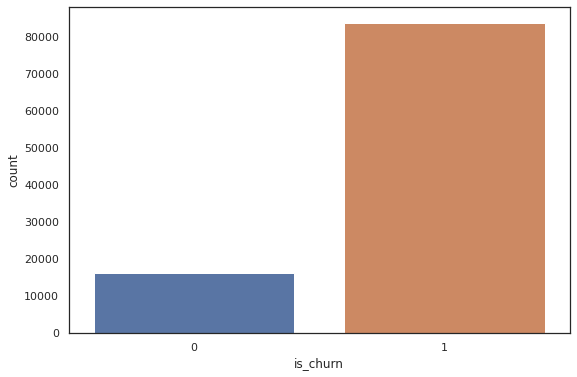

In [107]:
# Imbalance Data

# Observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(df_final.is_churn)

#The imbalanced data is solved by using stratified k-fold

<AxesSubplot:>

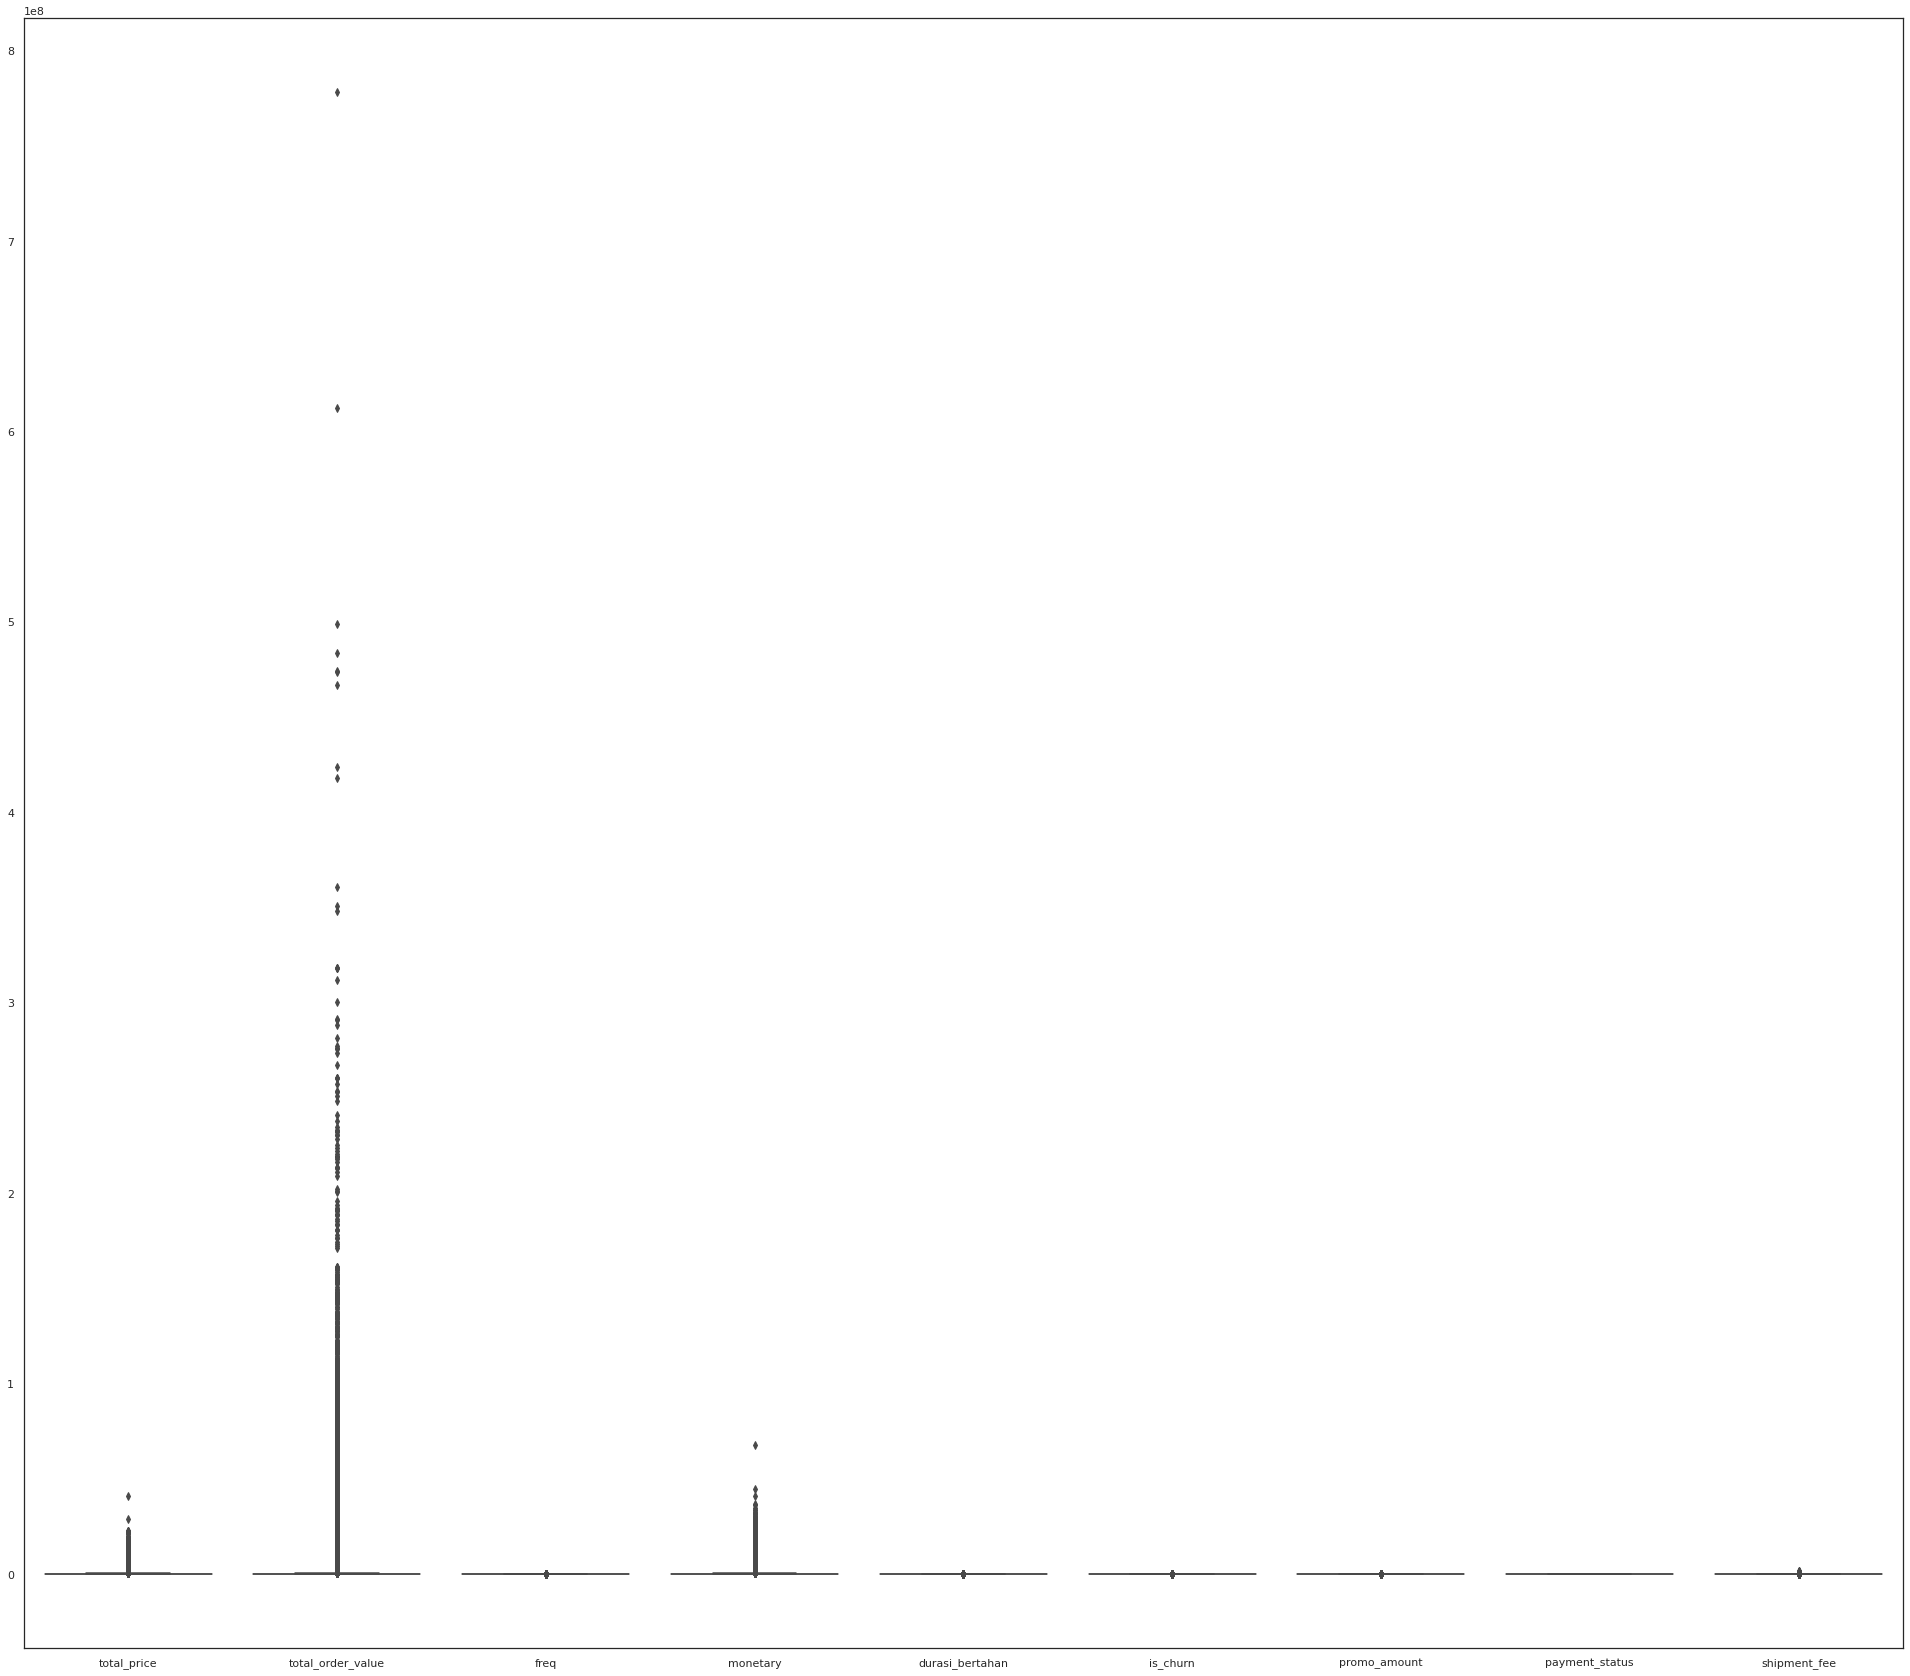

In [108]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df_final)

In [109]:
# Z-Score
columns = list(df_final.columns.values)

for i in columns:
    upper_limit = df_final[i].mean() + 3*df_final[i].std()
    lower_limit = df_final[i].mean() - 3*df_final[i].std()

    df_final[i] = np.where(
        df_final[i]>upper_limit,
        upper_limit,
        np.where(
            df_final[i]<lower_limit,
            lower_limit,
            df_final[i]
        )
    )

<AxesSubplot:>

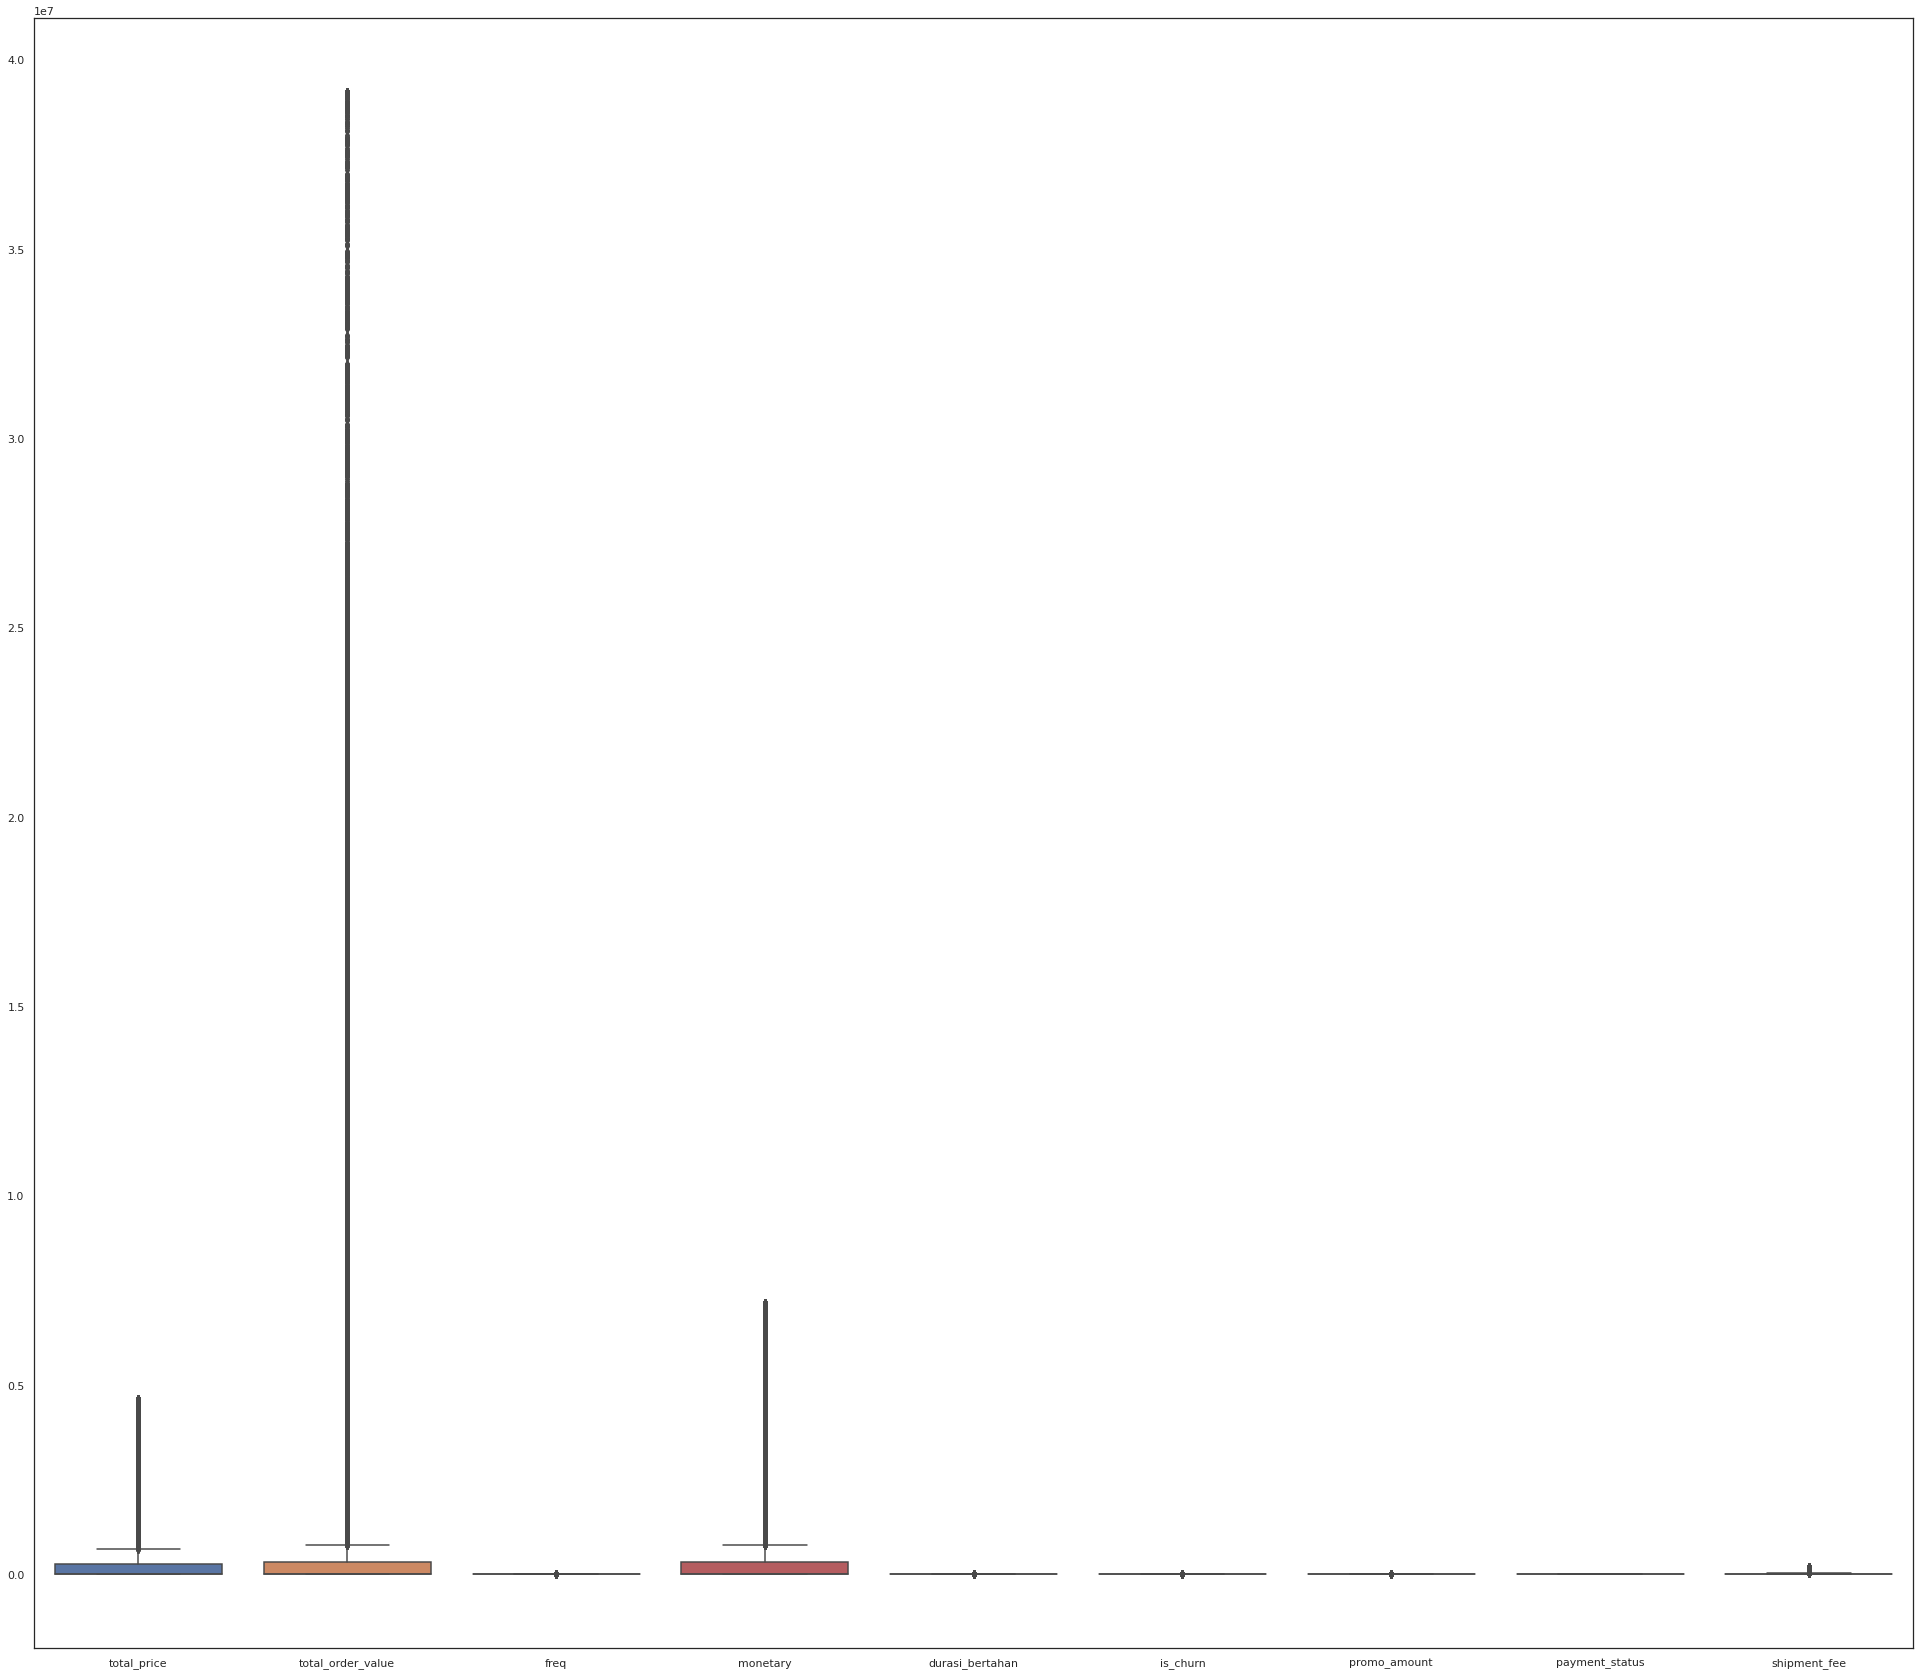

In [110]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df_final)

<AxesSubplot:>

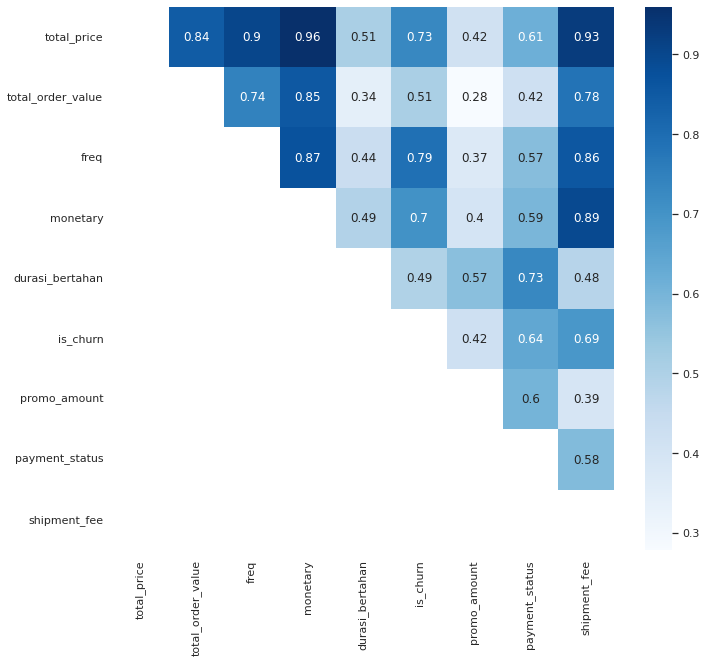

In [111]:
# Create correlation matrix
corr_matrix = df_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

In [112]:
df_final=df_final.drop(columns = ['shipment_fee','total_price','total_order_value','monetary'])

<AxesSubplot:>

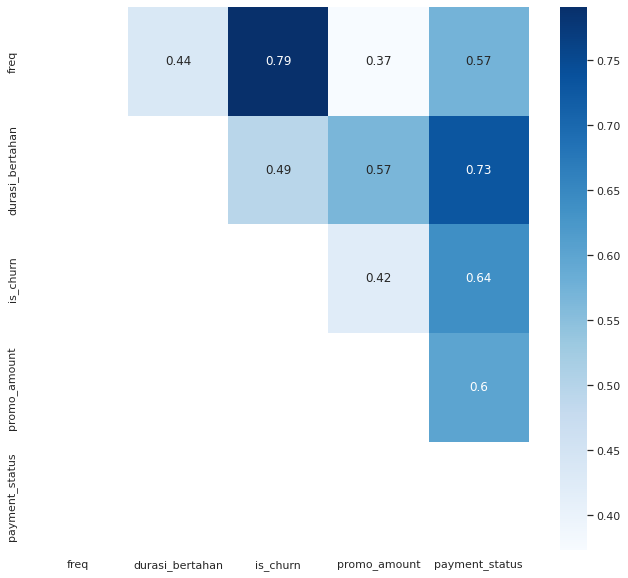

In [113]:
# Create correlation matrix
corr_matrix = df_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

# Modelling

In [114]:
# Memisahkan mana X dan mana y
y= df_final['is_churn']
X= df_final.drop(['is_churn'],1)
X.head()

,freq,durasi_bertahan,promo_amount,payment_status
0,0.000000,0.0,0.00000,0.0000
1,0.000000,0.0,0.00000,0.0000
2,3.539862,432.0,778.84375,0.8125
3,0.000000,0.0,0.00000,0.0000
4,0.000000,0.0,0.00000,0.0000


In [115]:
y

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
99995    0.0
99996    1.0
99997    0.0
99998    1.0
99999    0.0
Name: is_churn, Length: 100000, dtype: float64

In [116]:
#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [117]:
#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

In [118]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [119]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [
            DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
#             SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier
            ]

model_name = [
        'DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
#             'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier'
             ]
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [0.9996], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.9795], 1 of KFold 5
DecisionTreeClassifier Recall: [0.9877604633112425], 1 of KFold 5
DecisionTreeClassifier Precission: [0.9877604633112425], 1 of KFold 5
DecisionTreeClassifier AUC: [0.9623514712742001], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [0.9996], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.9795], 2 of KFold 5
DecisionTreeClassifier Recall: [0.9877604633112425], 2 of KFold 5
DecisionTreeClassifier Precission: [0.9877604633112425], 2 of KFold 5
DecisionTreeClassifier AUC: [0.9623514712742001], 2

In [120]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
8,XGBClassifier,0.990585,0.98593,0.997583,0.985587,0.986642,0.004655
6,GradientBoostingClassifier,0.985122,0.98442,0.997880,0.983485,0.986360,0.000703
5,RandomForestClassifier,0.999553,0.98439,0.995981,0.985336,0.982426,0.015163
7,ExtraTreesClassifier,0.999565,0.98360,0.995020,0.985348,0.979972,0.015965
0,DecisionTreeClassifier,0.999565,0.97870,0.987784,0.986769,0.961952,0.020865
1,LogisticRegression,0.975667,0.97555,0.981601,0.989348,0.946910,0.000117
4,LinearSVC,0.953438,0.95425,0.988445,0.956653,0.949263,0.000812
2,KNeighborsClassifier,0.948530,0.92527,0.959360,0.951053,0.871755,0.023260
3,GaussianNB,0.906772,0.90677,0.996796,0.891537,0.938387,0.000002


In [122]:
import warnings
warnings.filterwarnings('ignore')

# Hyperparameter Tuning

In [123]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [124]:
#Grid Search RandomForestClassifier


model = RandomForestClassifier()

param = dict()
param['n_estimators']= [100]
param['criterion'] = ['entropy', 'gini']
param['bootstrap'] = [True, False]
param['max_depth'] = [6]
param['max_features'] = ['auto', 'sqrt']

cv = StratifiedKFold(n_splits=5)
clfRF = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clfRF.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.984 total time=   5.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.984 total time=   5.2s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.984 total time=   5.2s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.983 total time=   5.4s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.984 total time=   4.6s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100;, score=0.984 total time=   4.7s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100;, score=0.983 total time=   4.7s
[CV 3/5] END bootstrap=True, c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'], 'max_depth': [6],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=4)

In [125]:
print('Best Score: {}'.format(clfRF.best_score_))
print('Best Hyperparameters: {}'.format(clfRF.best_params_))

Best Score: 0.9840899999999999
Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}


In [126]:
#Grid Search GradientBoosting


model = GradientBoostingClassifier()

param = dict()
param['loss']= ["deviance"]
param['learning_rate'] = [0.025, 0.075, 0.2]
param['criterion'] = ["friedman_mse"]
param['max_depth'] = [3, 8]
param['n_estimators'] = [10]

cv = StratifiedKFold(n_splits=5)
clfGB = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clfGB.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, n_estimators=10;, score=0.837 total time=   0.6s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, n_estimators=10;, score=0.837 total time=   0.6s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, n_estimators=10;, score=0.837 total time=   0.6s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, n_estimators=10;, score=0.837 total time=   0.6s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, n_estimators=10;, score=0.837 total time=   0.6s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=8, n_estimators=10;, score=0.837 total time=   1.2s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=8, n_estimators=10;, score=0.837 total time=   

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.025, 0.075, 0.2],
                         'loss': ['deviance'], 'max_depth': [3, 8],
                         'n_estimators': [10]},
             scoring='accuracy', verbose=4)

In [127]:
print('Best Score: {}'.format(clfGB.best_score_))
print('Best Hyperparameters: {}'.format(clfGB.best_params_))

Best Score: 0.9853200000000001
Best Hyperparameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'n_estimators': 10}


In [128]:
#Grid Search XGBClassifier


model = XGBClassifier()

param = dict()
param['min_child_weight']= [1, 10]
param['gamma'] = [1, 2]
# param['subsample'] = [0.6, 1.0]
# param['colsample_bytree'] = [0.3, 1.0]
param['max_depth'] = [4, 5]

cv = StratifiedKFold(n_splits=5)
clfXGB = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clfXGB.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 2/5] END gamma=1, max_depth=4, min_child_weight=1;, score=0.984 total time=   4.6s
[CV 1/5] END gamma=1, max_depth=4, min_child_weight=1;, score=0.986 total time=   4.6s
[CV 3/5] END gamma=1, max_depth=4, min_child_weight=1;, score=0.986 total time=   4.6s
[CV 4/5] END gamma=1, max_depth=4, min_child_weight=1;, score=0.986 total time=   4.6s
[CV 3/5] END gamma=1, max_depth=4, min_child_weight=10;, score=0.986 total time=   4.3s
[CV 1/5] END gamma=1, max_depth=4, min_child_weight=10;, score=0.986 total time=   4.4s
[CV 5/5] END gamma=1, max_depth=4, min_child_weight=1;, score=0.986 total time=   4.5s
[CV 2/5] END gamma=1, max_depth=4, min_child_weight=10;, score=0.984 total time=   4.5s
[CV 4/5] END gamma=1, max_depth=4, min_child_weight=10;, score=0.985 total time=   4.5s
[CV 5/5] END gamma=1, max_depth=4, min_child_weight=10;, score=0.986 total time=   4.5s
[CV 2/5] END gamma=1, max_depth=5, min_child_weight=1;, score=0.9

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interacti...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [129]:
print('Best Score: {}'.format(clfXGB.best_score_))
print('Best Hyperparameters: {}'.format(clfXGB.best_params_))

Best Score: 0.98583
Best Hyperparameters: {'gamma': 1, 'max_depth': 5, 'min_child_weight': 1}


In [130]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [131]:
#Pisahin X, y jadi X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (80000, 4)
y_train dataset shape:  (80000,)
X_test dataset shape:  (20000, 4)
y_test dataset shape:  (20000,)


In [132]:
# Buat Model Pakai Best Param Dari GridSearchCV
modeltun = XGBClassifier(**clfXGB.best_params_)

In [133]:
# Melatih Model Pakai data train kita
model_fit = modeltun.fit(X_train,y_train)

In [134]:
# Cek Peforma model kita di data latih
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     13025
         1.0       1.00      0.99      0.99     66975

    accuracy                           0.99     80000
   macro avg       0.97      0.99      0.98     80000
weighted avg       0.99      0.99      0.99     80000



In [135]:
# Cek Peforma model kita di data test
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      3232
         1.0       1.00      0.99      0.99     16768

    accuracy                           0.99     20000
   macro avg       0.97      0.99      0.98     20000
weighted avg       0.99      0.99      0.99     20000



# Feature Importance

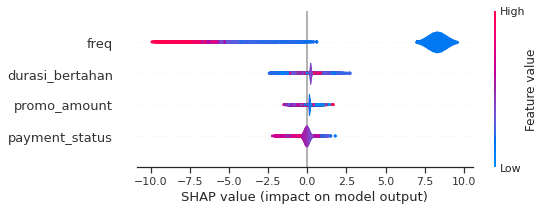

In [136]:
import shap

shap_values = shap.TreeExplainer(model_fit).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="violin")

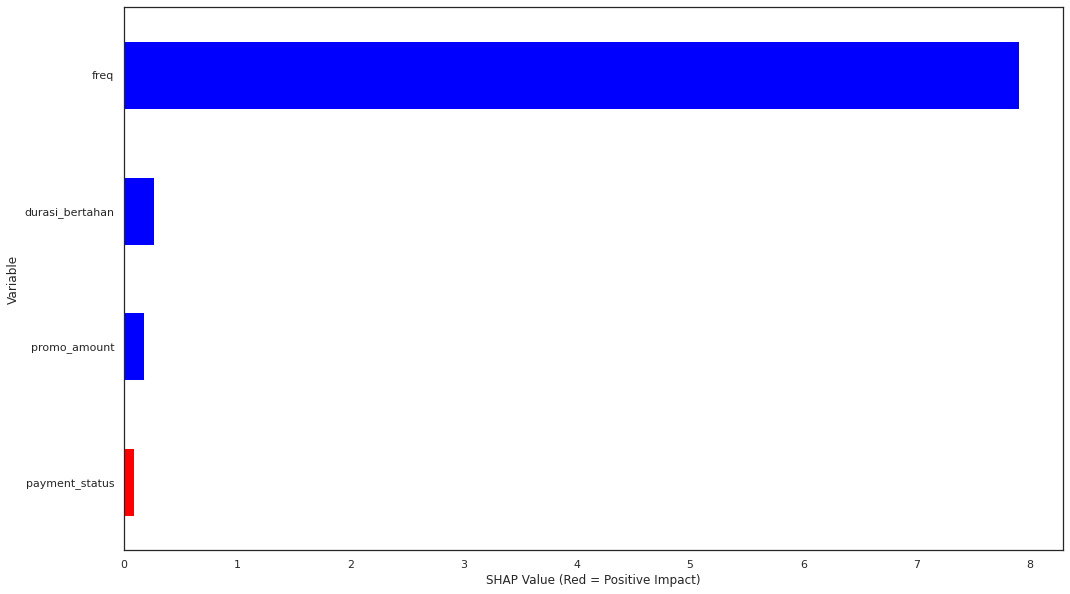

In [137]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',figsize=(15, 10),color = colorlist,legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train)

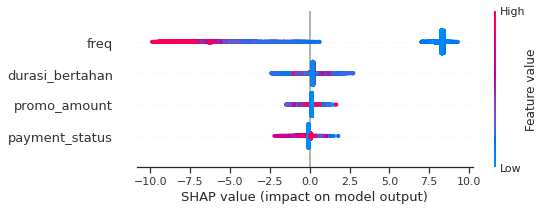

In [138]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)
#f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

Berdasarkan karakteristik diatas maka
1. Semakin tinggi nilai `freq` semakin rendah churn rate
2. Semakin tinggi nilai `monetary` semakin tinggi churn rate
3. Semakin tinggi nilai `durasi_bertahan` semakin rendah churn rate
4. Semakin tinggi nilai `total_order_value` semakin tinggi churn rate
5. Semakin tinggi nilai `payment_status` semakin rendah churn rate
6. Semakin tinggi nilai `promo_amount` semakin tinggi churn rate

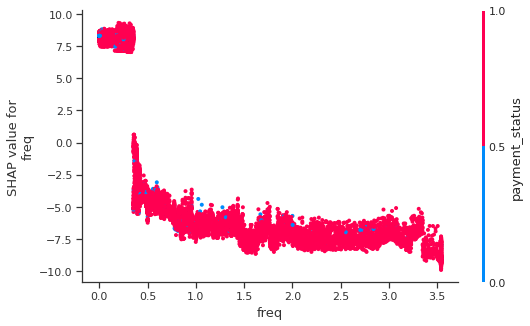

In [139]:
shap.dependence_plot('freq', shap_values, X_train)

In [140]:
# shap.dependence_plot('monetary', shap_values, X_train)

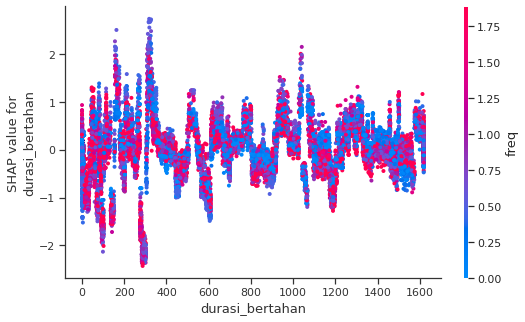

In [141]:
shap.dependence_plot('durasi_bertahan', shap_values, X_train)

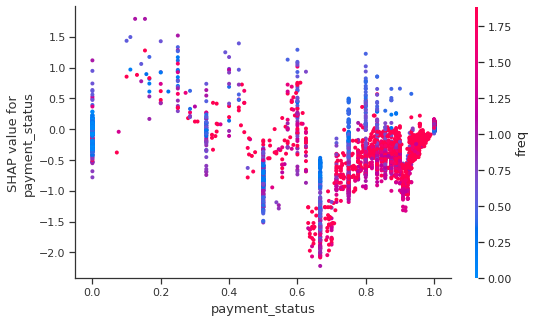

In [142]:
shap.dependence_plot('payment_status', shap_values, X_train)

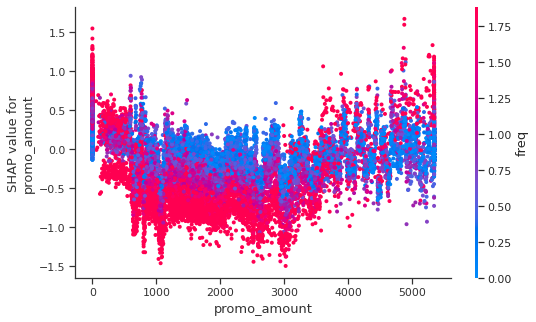

In [143]:
shap.dependence_plot('promo_amount', shap_values, X_train)